# Laporan Proyek Machine Learning - Robert Varian

# Data Understanding
Dataset yang digunakan adalah Telco Customer Churn Dataset, tersedia di Kaggle:
🔗 https://www.kaggle.com/datasets/blastchar/telco-customer-churn

Dataset ini berisi informasi pelanggan dari perusahaan telekomunikasi fiktif.

## Variabel Utama:
* gender, SeniorCitizen, Partner, Dependents
* tenure, PhoneService, MultipleLines, InternetService
* Contract, PaymentMethod, MonthlyCharges, TotalCharges
* Target: Churn (Yes/No)


# Data Preparation

Melakukan import library

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


## Data Loading

Memasukkan kaggle.json untuk menggunakan api json

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"grandhavoc","key":"53aad8c892f982db09c5547e125582c7"}'}

memasukkan kaggle.json agar bisa digunakan

In [5]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mendownload library kaggle

In [6]:
!pip install kaggle

mendownload dataset telco-customer-churn langsung dari kaggle

In [7]:
!kaggle datasets download -d blastchar/telco-customer-churn

Dataset URL: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
License(s): copyright-authors
  0% 0.00/172k [00:00<?, ?B/s]
100% 172k/172k [00:00<00:00, 421MB/s]


membuka file zip yang telah di downloadkan

In [8]:
import zipfile
with zipfile.ZipFile("telco-customer-churn.zip", "r") as zip_ref:
    zip_ref.extractall("telco_data")

membuka file csv yang telah di download

In [9]:
df = pd.read_csv("telco_data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

Melihat apakah pengguna akan churn atau tidak berdasarkan distribusinya

## Exploratory Data Analysis

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Tidak ada nilai kosong pada dataset ini.
Variabel Utama yang akan dipakai adalah `Churn`
Variabel pendukung seperti
- gender
- seniorcitizen
- partner
- dependents
- tenure
- phoneservice
- multiplelines
- internetservice
- onlinesecurity
- onlinebackup
- deviceprotection
- techsupport
- streamingtv
- steamingmovies
- contract
- paperlessbilling
- paymentmethod
- monthlycharges
- totalcharges

Menampilkan distribusi fitur beserta churn

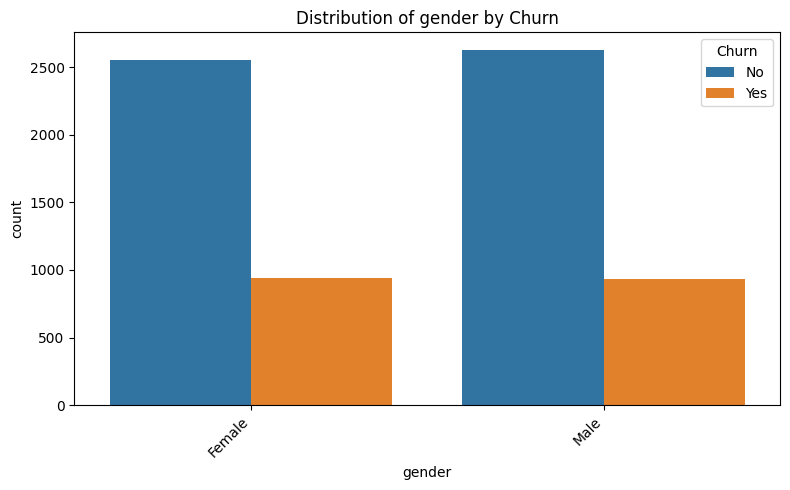

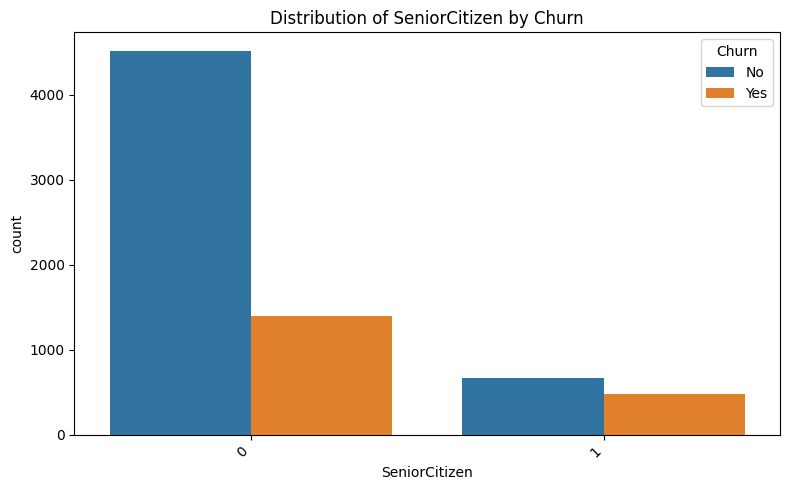

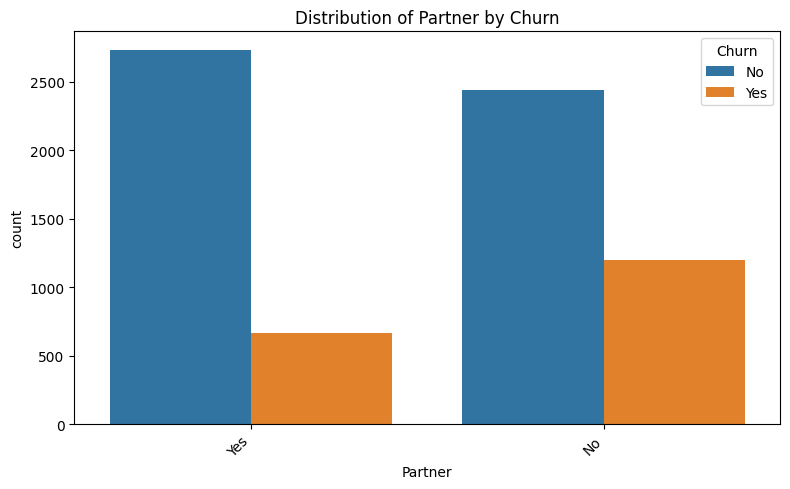

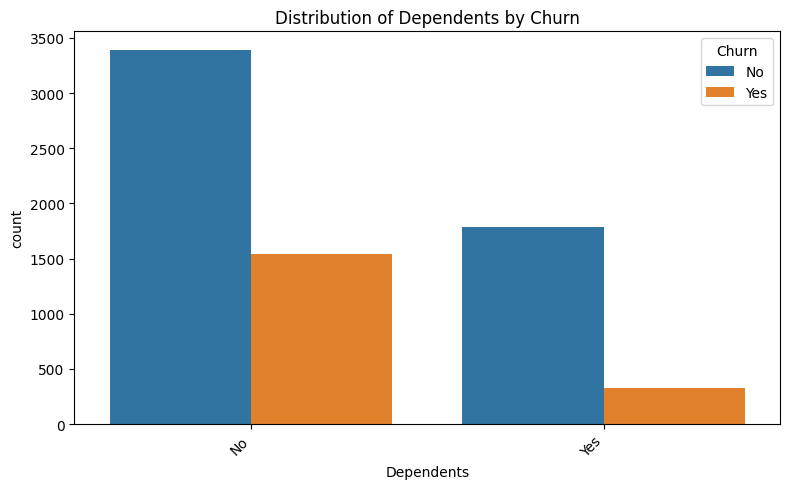

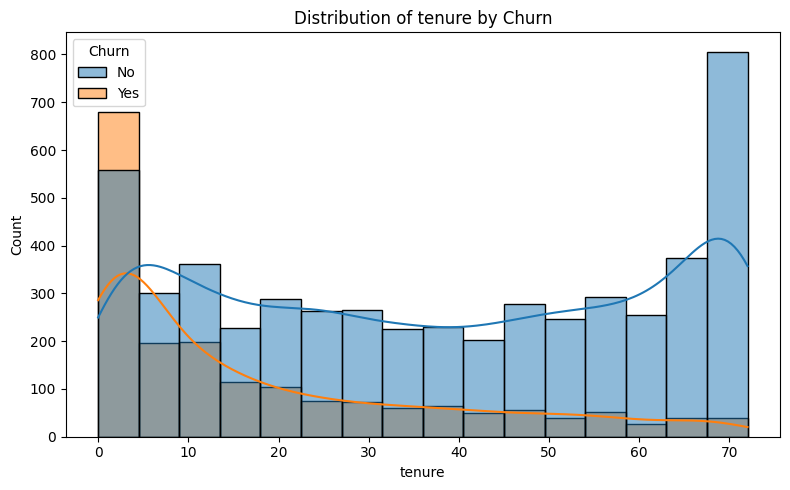

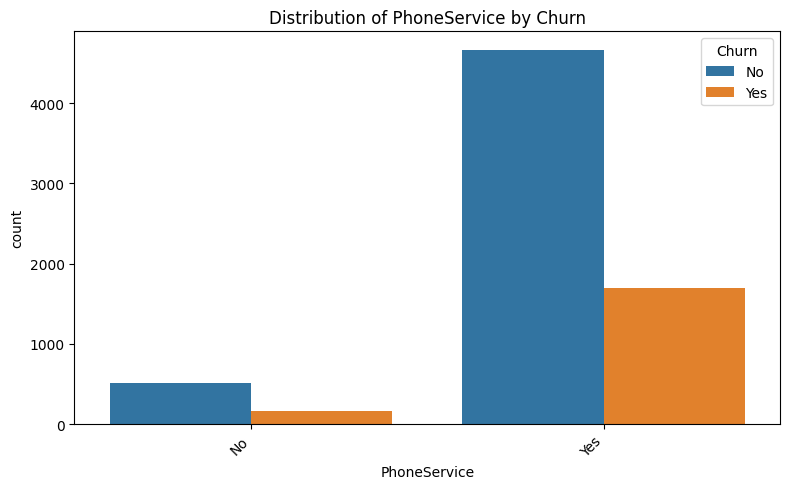

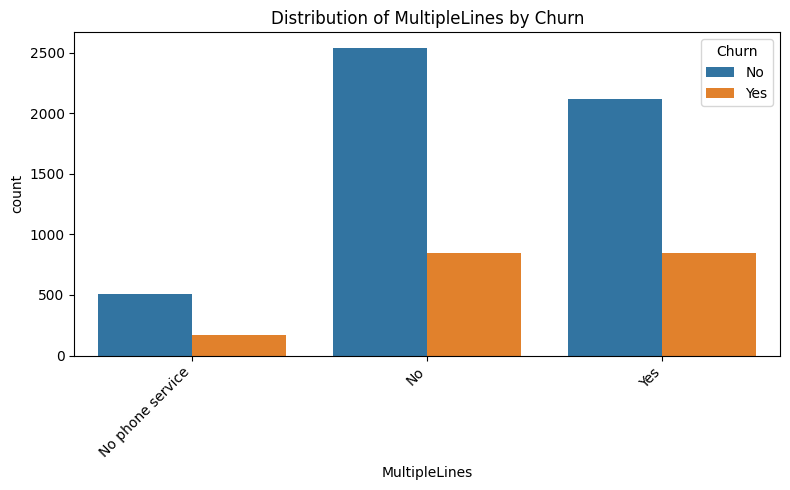

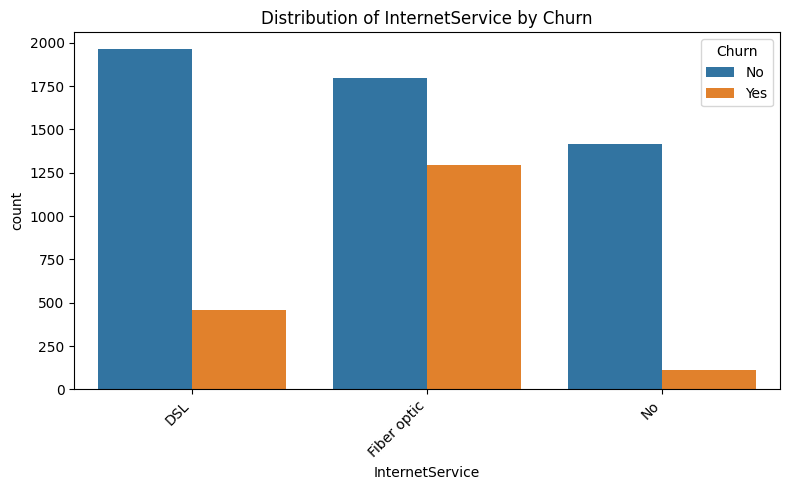

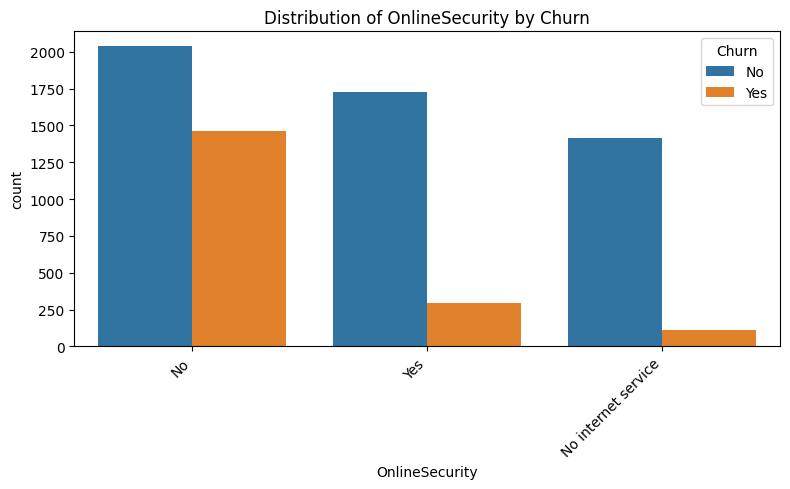

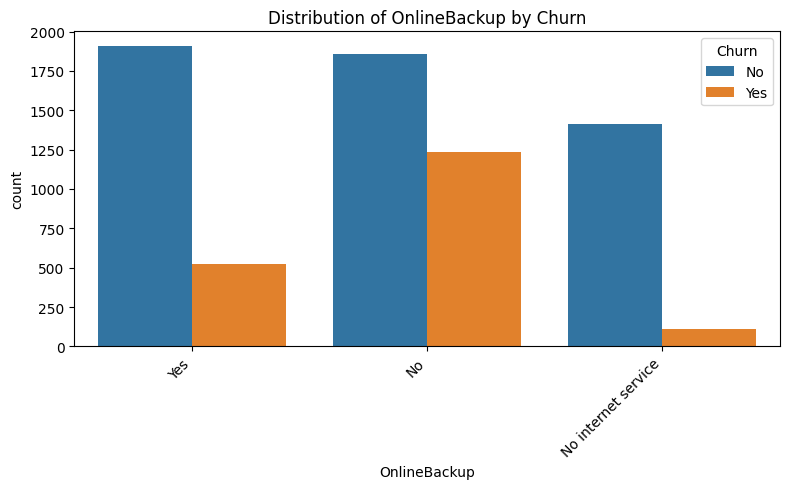

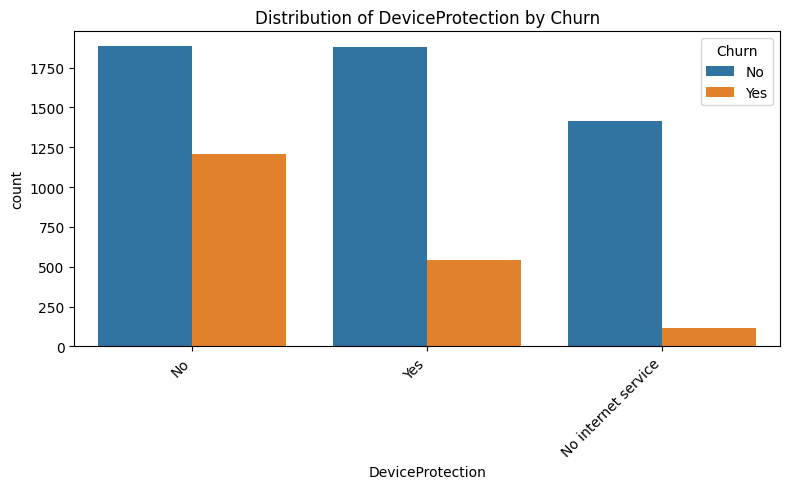

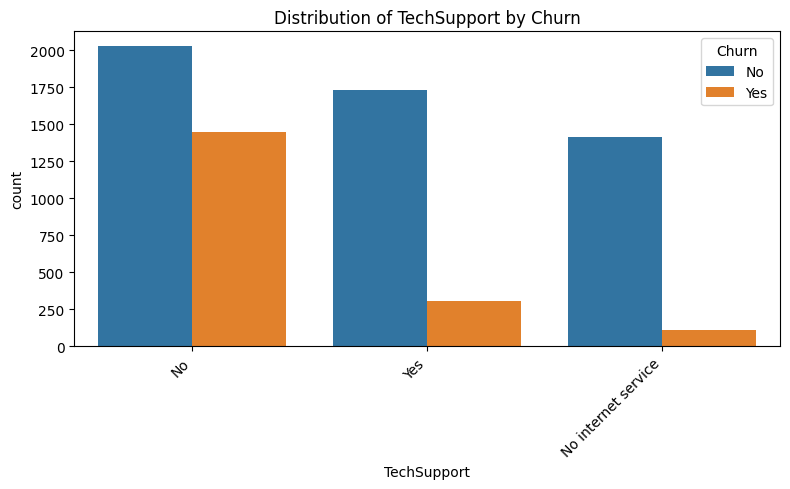

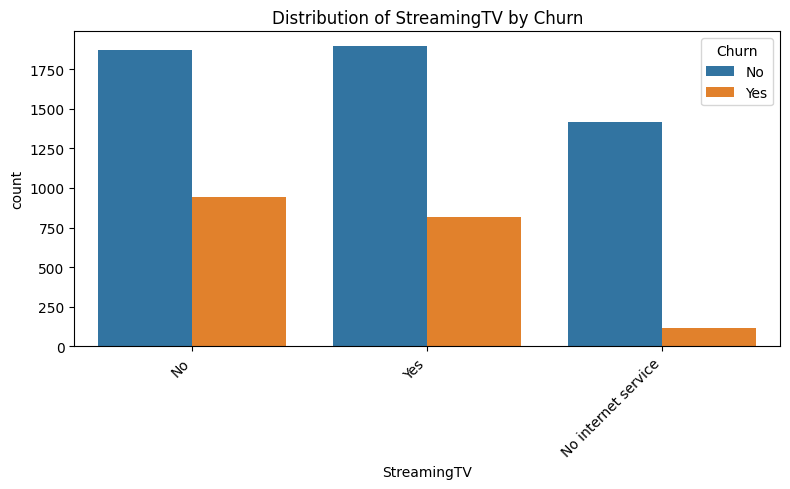

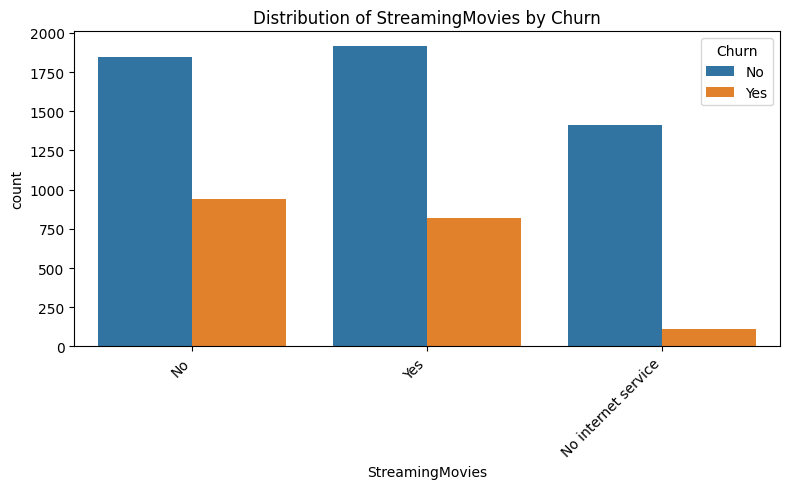

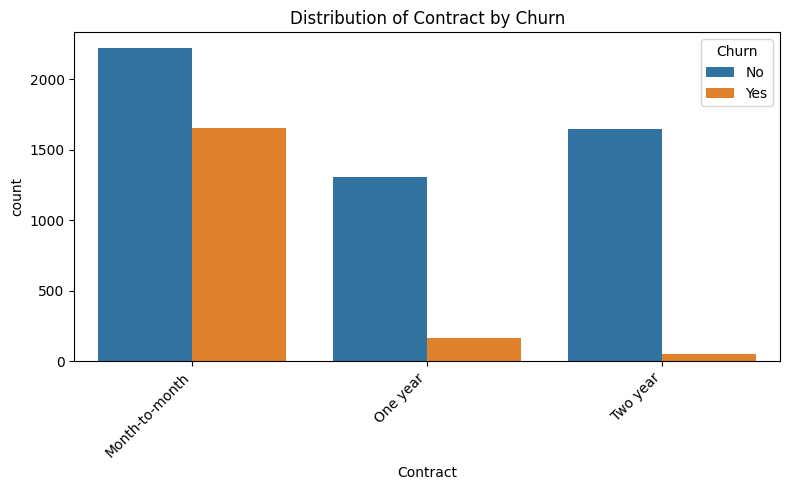

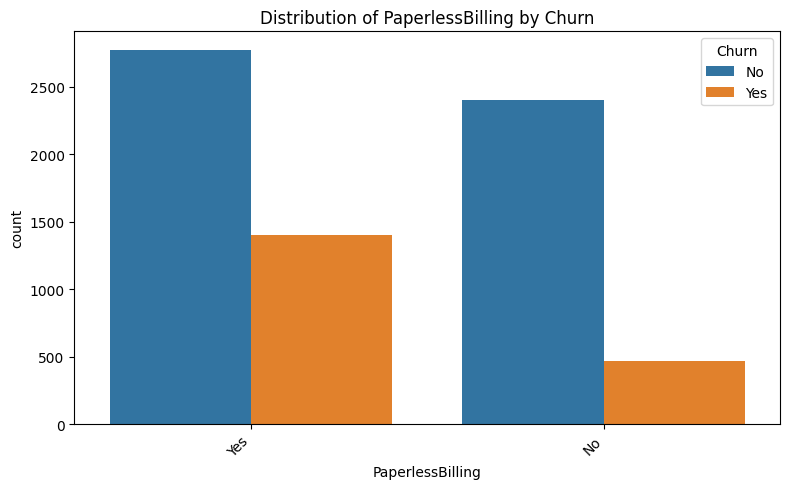

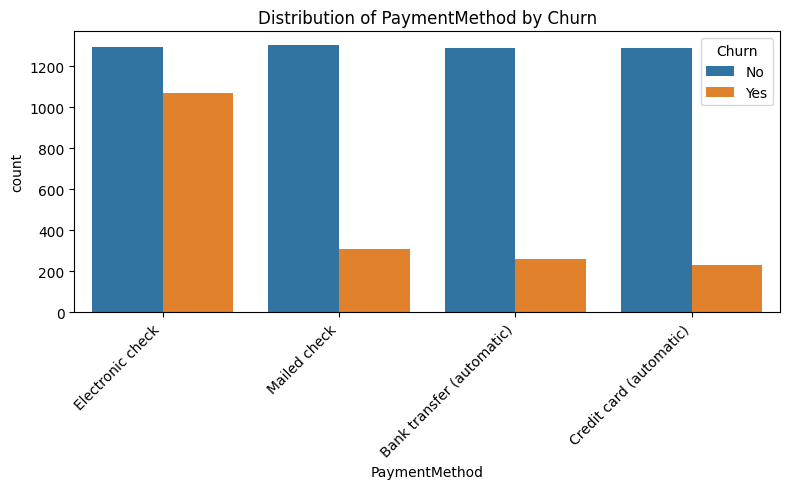

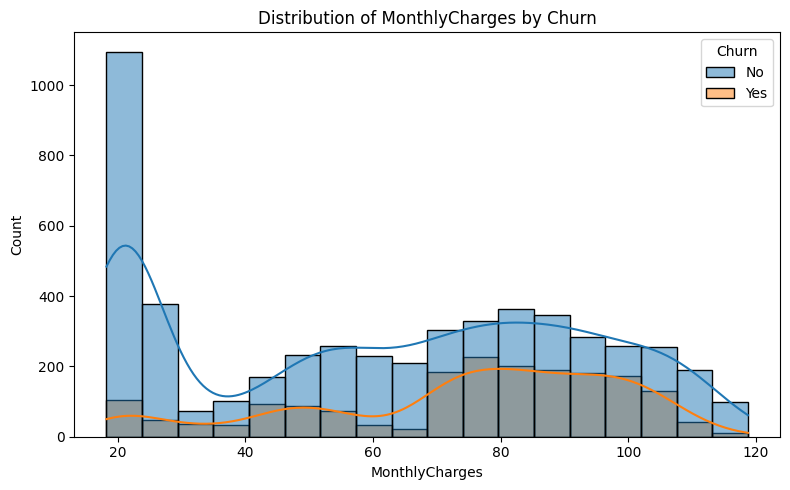

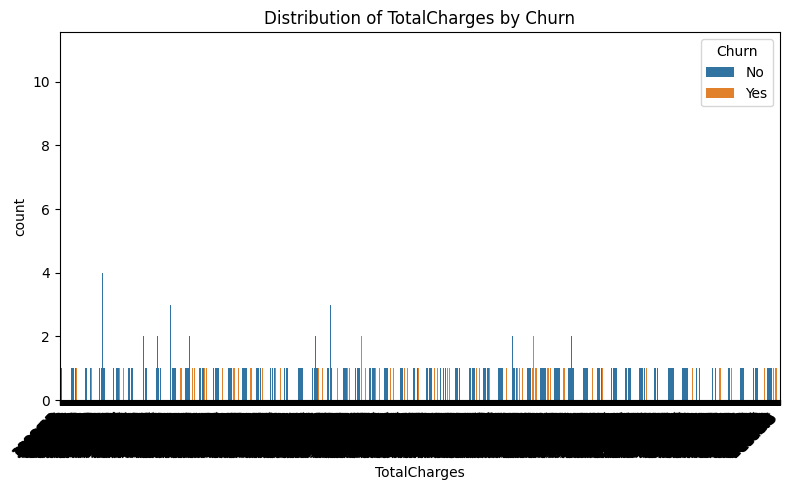

In [ ]:
columns_to_plot = df.columns.tolist()
columns_to_plot.remove('customerID')
columns_to_plot.remove('Churn')

for col in columns_to_plot:
    plt.figure(figsize=(8, 5))
    if df[col].dtype == 'object' or df[col].nunique() < 10: # Categorical or low cardinality columns
        sns.countplot(data=df, x=col, hue='Churn')
        plt.title(f'Distribution of {col} by Churn')
        plt.xticks(rotation=45, ha='right')
    else: # Numerical columns
        sns.histplot(data=df, x=col, hue='Churn', kde=True)
        plt.title(f'Distribution of {col} by Churn')
    plt.tight_layout()
    plt.show()


Berdasarkan plot yang didapatkan diatas didapatkan kesimpulan bahwa churn dapat terjadi kapan saja tidak tergantung dari `monthly charges` atau `total charges`. Dan dari data masih belum ditemukan pasti penyebab churn dapat terjadi.

melakukan deteksi outlier dan menampilkannya pada kolom `total charges` dengan `monthly charges`

Outliers detected in column 'MonthlyCharges' using IQR:
Empty DataFrame
Columns: [MonthlyCharges]
Index: []


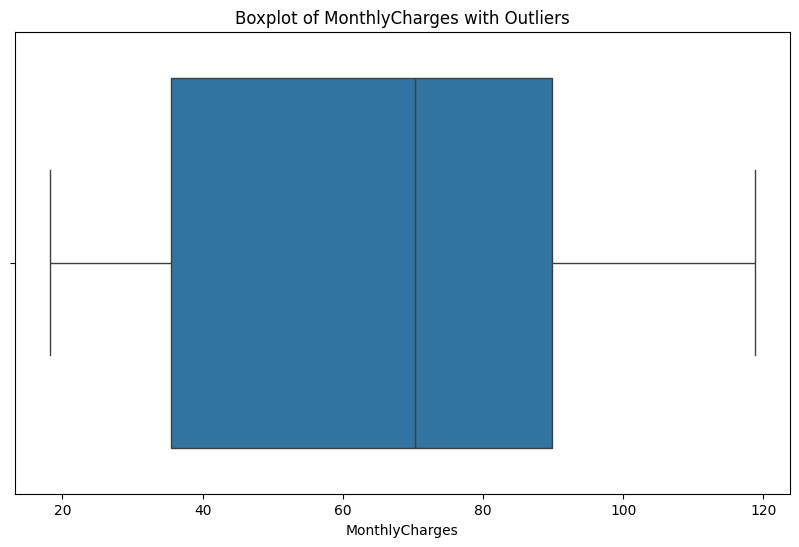

Outliers detected in column 'TotalCharges' using IQR:
Empty DataFrame
Columns: [TotalCharges]
Index: []


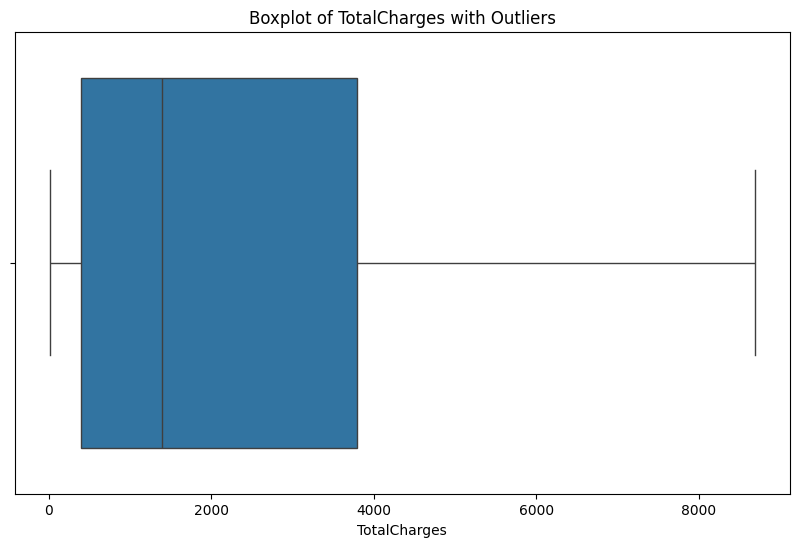

In [ ]:
def detect_and_visualize_outliers_iqr(df, column):
    """
    Detects outliers in a numerical column using the IQR method and visualizes the distribution.

    Args:
        df (pd.DataFrame): The input DataFrame.
        column (str): The name of the numerical column to analyze.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    print(f"Outliers detected in column '{column}' using IQR:")
    print(outliers[[column]])

    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column} with Outliers')
    plt.xlabel(column)
    plt.show()

detect_and_visualize_outliers_iqr(df.copy(), 'MonthlyCharges')

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(subset=['TotalCharges'], inplace=True)
detect_and_visualize_outliers_iqr(df.copy(), 'TotalCharges')

Tidak ditemukan outlier pada kedua fitur tersebut

## Data Cleaning

Membersihkan data `total charges`. membuang data kosong, melakukan encode pada `churn`, menghapus `customerid`

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
df.drop(['customerID'], axis=1, inplace=True)
df = pd.get_dummies(df, drop_first=True)

## Feature Scalling

Melakukan scalling pada data dengan size test 20%

In [ ]:
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modeling

## Model 1: Logistic Regression

Cara Kerja
- Logistic Regression adalah model klasifikasi linier yang digunakan untuk memprediksi probabilitas dari kelas target.

Fungsi utama
- z = β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ

Nilai z kemudian dipetakan ke rentang 0–1 menggunakan fungsi sigmoid:
- P(y=1|x) = 1 / (1 + exp(-z))
Probabilitas diklasifikasikan ke dalam label 0 atau 1 berdasarkan threshold (biasanya 0.5).

In [ ]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_lr = log_reg.predict(X_test_scaled)

- max_iter adalah parameter yang menentukan jumlah maksimum iterasi yang digunakan oleh solver dalam proses optimasi model Logistic Regression.

## Model 2: Random Forest

Cara Kerja
- Random Forest adalah algoritma ensemble berbasis banyak pohon keputusan.
- Setiap pohon dilatih menggunakan subset acak dari data (bootstrap sampling).
- Prediksi akhir berdasarkan voting mayoritas (klasifikasi) atau rata-rata (regresi) dari semua pohon.

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

- random_state memastikan bahwa proses pelatihan model menjadi reproducible (hasil yang konsisten tiap kali dijalankan).

## Model 3: XGBoost

Cara Kerja
- XGBoost adalah algoritma boosting berbasis pohon yang melatih pohon berturut-turut untuk memperbaiki kesalahan dari model sebelumnya.
- Menggunakan residual error dari prediksi sebelumnya sebagai target untuk pohon berikutnya.
- Menggabungkan boosting dan regularisasi untuk meningkatkan performa dan menghindari overfitting.

In [ ]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:26:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


- Logloss (logarithmic loss) adalah metrik yang mengukur seberapa dekat prediksi probabilitas dengan label sebenarnya.
- random_state memastikan bahwa proses pelatihan model menjadi reproducible (hasil yang konsisten tiap kali dijalankan).

# Evaluation


Melakukan evaluasi data dari hasil yang didapatkan

In [ ]:
def evaluate_model(name, y_true, y_pred):
    return {
        'Model': name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1-Score': f1_score(y_true, y_pred)
    }

results = [
    evaluate_model("Logistic Regression", y_test, y_pred_lr),
    evaluate_model("Random Forest", y_test, y_pred_rf),
    evaluate_model("XGBoost", y_test, y_pred_xgb)
]

results_df = pd.DataFrame(results)
results_df.sort_values(by="F1-Score", ascending=False)

Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.787491   0.620579  0.516043  0.563504
1        Random Forest  0.785359   0.626761  0.475936  0.541033
2              XGBoost  0.763326   0.565916  0.470588  0.513869

Berdasarkan evaluasi metrik, dibuatkan visualisasi sebagai perbandingan antar model

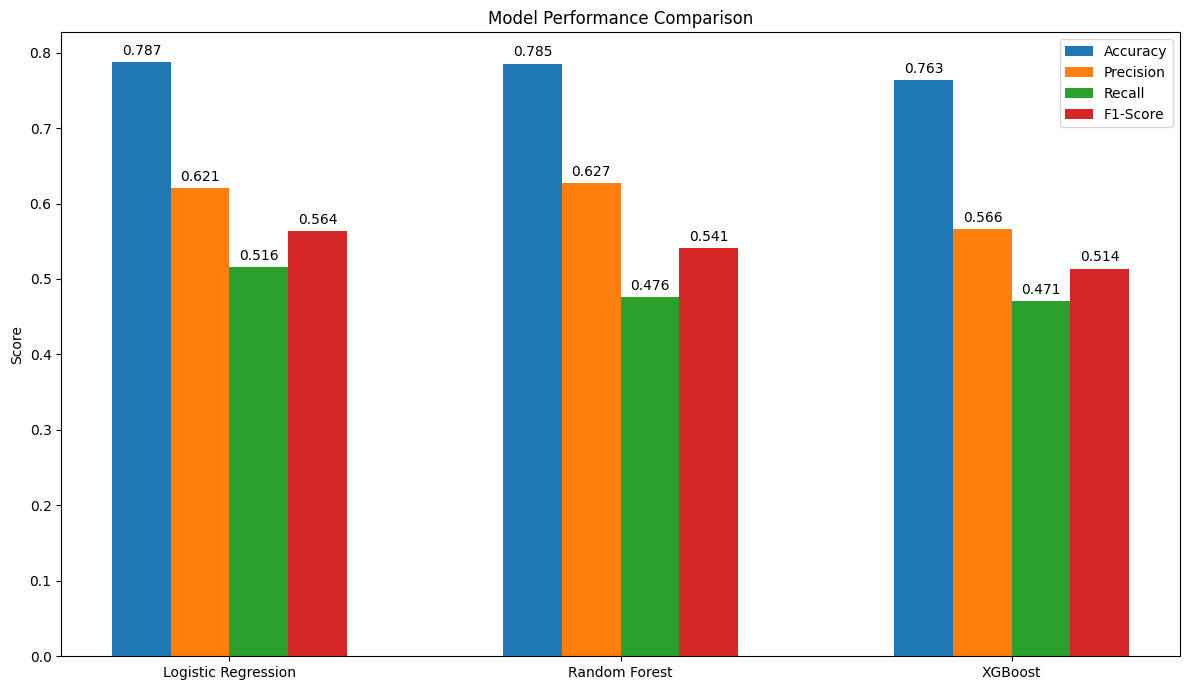

In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
models = results_df['Model']

x = np.arange(len(models))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 7))

for i, metric in enumerate(metrics):
    rects = ax.bar(x + i*width, results_df[metric], width, label=metric)
    ax.bar_label(rects, padding=3, fmt='%.3f')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x + width * (len(metrics) - 1) / 2)
ax.set_xticklabels(models)
ax.legend()

fig.tight_layout()
plt.show()

Telihat pada gambar diatas bahwa
## Logistic Regression
- Accuracy : 0.787
- Precision : 0.621
- Recall : 0.516
- F1-Score : 0.564

## Random Forest
- Accuracy : 0.785
- Precision : 0.627
- Recall : 0.476
- F1-Score : 0.541

## XGBoost
- Accuracy : 0.763
- Precision : 0.566
- Recall : 0.471
- F1-Score : 0.514

Logistic regression lebih cocok untuk kasus ini. Karena F1-Score yang didapatkan lebih tinggi dibandingkan model Random Forest dan XGBoost.